In [259]:
library(igraph)
library(NetIndices)

In [260]:
df <- read.table('data.csv', sep = ';')
dat <- matrix(unlist(df), ncol = 601) # Convert list to a matrix

# Creating Adjacency Matrix

In [261]:
adj_mat <- dat

# If the value is 1 - keep it as it is; if it is 2,3 or some other value, make it 0.

i <- 2
j <- 2
while(i<602){
    j <- 2
    while(j<602){
    if(adj_mat[i,j] == 1){
        adj_mat[i,j] = 1
        }
    else{
        adj_mat[i,j] = 0
        }
        j <- j +1
        }
    i <- i + 1
}

adj_mat <- adj_mat[2:601,2:601]

In [262]:
adj <- graph_from_adjacency_matrix(adj_mat, mode = 'undirected')

# Calculating Average Shortest Length (L)

In [263]:
sum_of_shortest_lengths <- 0
number_of_word_pairs <- 0

i <- 2
j <- 2   

In [264]:
while(i<601){
    j <- i + 1
    while(j<601){
    sum_of_shortest_lengths <- sum_of_shortest_lengths + as.double(dat[j,i])
    number_of_word_pairs <- number_of_word_pairs + 1
    j <- j + 1
        }
    i <- i + 1
    }
L <- sum_of_shortest_lengths / number_of_word_pairs

In [265]:
L # the average length of shortest path between pairs of nodes

[1] 3.394638

# Diameter of Network

In [266]:
diameter(adj) # diameter of the network

[1] 9

# < k > mean number of connections

In [267]:
test.graph.adj<-get.adjacency(adj,sparse=F)
test.graph.properties<-GenInd(test.graph.adj)
test.graph.properties$LD

[1] 5.38

# Cluster Coefficient

In [268]:
transitivity(adj, type = 'undirected')

[1] 0.1202174

# Network Plotting

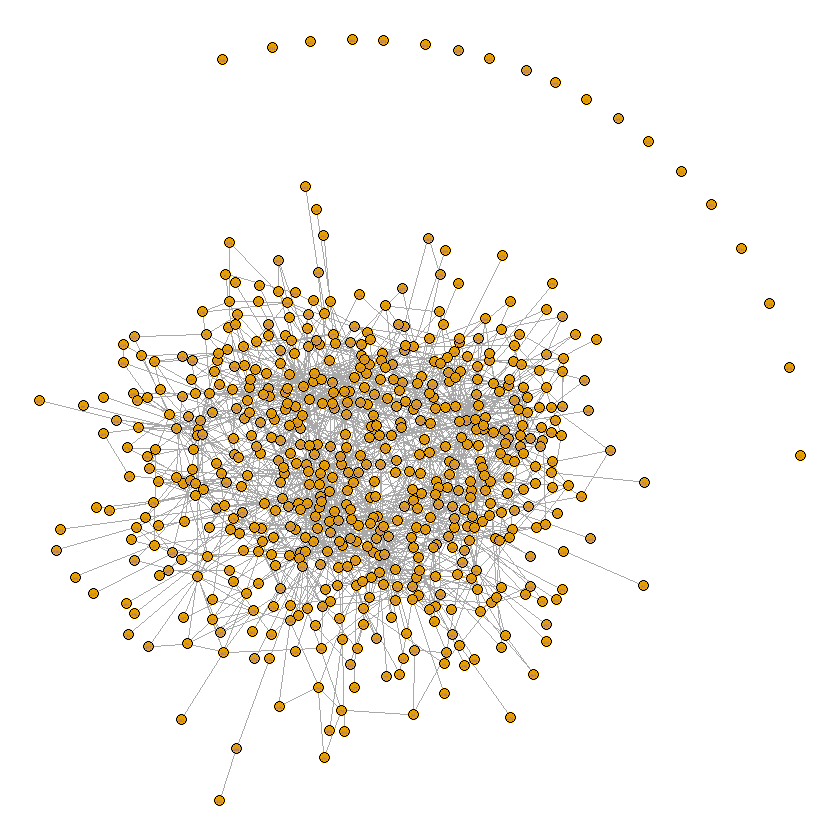

In [269]:
par(mar=c(.1,.1,.1,.1))

plot.igraph(adj,
layout=layout.fruchterman.reingold,
vertex.size=3,
vertex.label.cex=.2,
edge.arrow.size=.01)

# Degree Distribution

In [274]:
deg.distr<-degree.distribution(adj,cumulative=T,mode="all")

In [277]:
all.deg.testgraph<-degree(adj,v=V(adj),mode="all")
power<-power.law.fit(all.deg.testgraph)

## Expected Power Law Distribution is demonstrated by straight line while the observed distribution as dotted line.

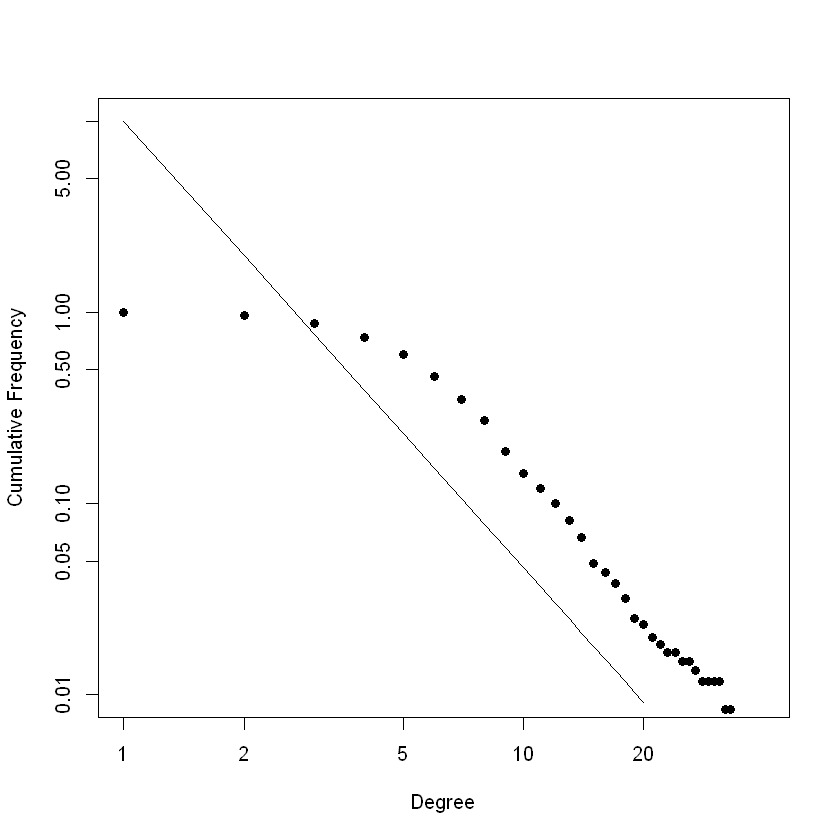

In [278]:
plot(deg.distr,log="xy",
ylim=c(.01,10),
bg="black",pch=21,
xlab="Degree",
ylab="Cumulative Frequency")
lines(1:20,10*(1:20)^((-power$alpha)+1))